Solving questions from: [2022 hw - week 2](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/02-regression/homework.md)

# Section 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/housing.csv')

In [3]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'median_house_value',]

data = data[columns]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


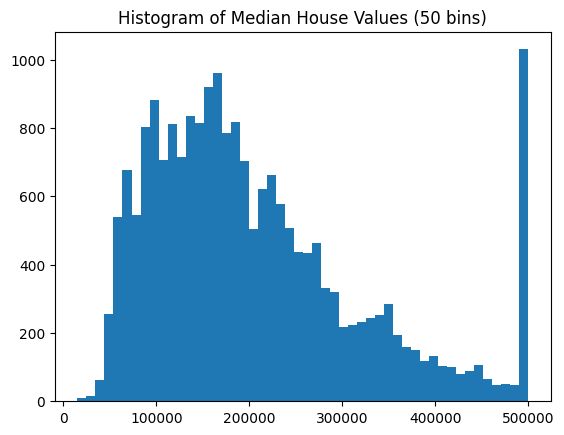

In [4]:
_ = plt.hist(data.median_house_value, bins=50, label='median_house_value')
_ = plt.title("Histogram of Median House Values (50 bins)")
# _ = plt.legend()

In [5]:
data.median_house_value.describe(percentiles=[0.1, 0.9, 0.95, 0.98, 0.99,])

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
10%       82300.000000
50%      179700.000000
90%      376600.000000
95%      489810.000000
98%      500001.000000
99%      500001.000000
max      500001.000000
Name: median_house_value, dtype: float64

# Section 2

## Question 1
Find a feature with missing values. How many missing values does it have?

In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Answer**: 207

## Question 2

What's the median (50% percentile) for variable 'population'?

In [7]:
data.population.median()

1166.0

**Answer**: 1166

# Section 3

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
len_data = len(data)
len_data

20640

In [10]:
rng = np.random.default_rng(seed=42)  # recommended way to use the random module in numpy 
idx = np.arange(len_data)
rng.shuffle(idx)

idx, len(idx)

(array([15387,  1659, 14480, ...,  4802,  5668,  9864]), 20640)

In [11]:
n_val = int(len_data * 0.2)  # use 20% of the data for validation
n_test = int(len_data * 0.2)  # use 20% of the data for testing
n_train = len(data) - n_val - n_test  # use 60% of the data for training

print(n_train, n_val, n_test)


12384 4128 4128


In [12]:
assert n_train+n_val+n_test == len(idx)

In [13]:
# splits data into train, val, and test df, using shuffled indices 

train_df = data.iloc[idx[:n_train], :]
val_df = data.iloc[idx[n_train: n_train+n_val], :]
test_df = data.iloc[idx[n_train+n_val:], :]

len(train_df), len(val_df), len(test_df)

(12384, 4128, 4128)

In [14]:
# creates X and y for train, val, test

X_train = train_df.iloc[:, :-1].reset_index(drop=True)
y_train = train_df.median_house_value.values

X_val = val_df.iloc[:, :-1].reset_index(drop=True)
y_val = val_df.median_house_value.values

X_test = test_df.iloc[:, :-1].reset_index(drop=True)
y_test = test_df.median_house_value.values


len(y_train), len(y_val), type(X_test), type(y_test)

(12384, 4128, pandas.core.frame.DataFrame, numpy.ndarray)

In [15]:
print(y_train[:5])

[267600. 329400. 474000. 140600. 292000.]


In [16]:
print(y_val[:5])

[200900. 500001. 156300. 271800. 339700.]


In [17]:
print(y_test[:5])

[145800.  38800. 253700. 275000. 425800.]


In [18]:
# scales y by transforming it with a log function

(
    np.log1p(0),  # adds 1 to 0, then calculates natural log 
    min(y_train),  
    max(y_train), 
    round( np.log1p(min(y_train)), 3 ),  # calculates log1p of the min value for y
    round(np.log1p(max(y_train)), 3 )  # calculates log1p of the max value for y
)

(0.0, 14999.0, 500001.0, 9.616, 13.122)

In [19]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

min(y_train), max(y_train)

(9.615805480084347, 13.122367377396328)

Using `np.log1p` to transform `y` rather than `np.log` to avoid running into `-infinity` while training the model.  
Presently, we do not have any 0's in `y`, but we might later.

# Section 4

## Linear Regression

In [20]:
X = np.array(
    [[1,2,],
     [3,1,],
     [4,5,],
     [9,3,]]
)

X

array([[1, 2],
       [3, 1],
       [4, 5],
       [9, 3]])

In [21]:
X.shape

(4, 2)

In [22]:
y = np.array(
    [[12,],
     [11,],
     [33,],
     [33,]]
     
)
 
y

array([[12],
       [11],
       [33],
       [33]])

In [23]:
y.shape

(4, 1)

In [24]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w = XTX_inv.dot(X.T).dot(y)
w

array([[2.],
       [5.]])

In [25]:
def print_shapes():
    X = np.random.rand(4, 2)  # initialises X with the shape (4, 2)
    y = np.random.rand(4, 1)  # initialises y with the shape (4, 1)
    print(f"X.shape = {X.shape}")
    print(f"y.shape = {y.shape}")
    XTX = X.T.dot(X)
    print(f"XTX.shape = {XTX.shape}")
    print("inv(XTX) also has the same shape as XTX")
    w = XTX.dot(X.T).dot(y)
    print(f"w.shape = {w.shape}")

print_shapes()

X.shape = (4, 2)
y.shape = (4, 1)
XTX.shape = (2, 2)
inv(XTX) also has the same shape as XTX
w.shape = (2, 1)


In [26]:
def prepend_ones(X: np.ndarray) -> np.ndarray:
    """
    Returns a matrix with a column of 1's prepended to it as the first column.
    """
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


In [27]:
def train_linear_regression(X: np.ndarray, 
                      y: np.ndarray, 
                      r: int=None) -> np.ndarray:
    """
    Returns weights for a linear regression model trained using X and y.
    Optional parameter r for regularization.
    """

    # print(type(X), "\n\n", type(y))
    # prepend column of 1 to X
    X = prepend_ones(X)
    
    XTX = X.T.dot(X)
    # print(XTX)
    if r:
        XTX += np.eye(XTX.shape[0]) * r
        # print(XTX)
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
            
    return w


In [28]:
w_reg = train_linear_regression(X, y, r=0.001)
w_reg

array([[1.48702134e-03],
       [2.00003176e+00],
       [4.99941005e+00]])

In [29]:
def predict_linear_regression(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    """
    Returns predictions for a given house X, 
    using trained weights w.
    """
    
    X = prepend_ones(X)
    
    return X.dot(w) #.reshape(-1,)  # returns a one-dimensional array


In [30]:
w_lr = train_linear_regression(X, y)
y_pred = predict_linear_regression(X, w_lr)
# y_pred.shape
y_pred

array([[12.],
       [11.],
       [33.],
       [33.]])

In [48]:
def rmse(y_pred: np.ndarray, y_true: np.ndarray) -> np.float64:
    """
    Returns the root mean square error (rmse)
    using predicted values of the target variable (y_pred) 
    and actual values of the target variable (y_true).
    """

    rmse = np.sqrt((np.square(y_pred - y_true)).mean())
    return round(rmse, 2)


In [49]:
rmse(y_pred, y)

0.0

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [50]:
X_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        124
population              0
households              0
median_income           0
dtype: int64

In [51]:
X_fill_0 = X_train.fillna(0)
X_fill_0.total_bedrooms.isnull().sum()

0

In [52]:
w_0 = train_linear_regression(X_fill_0.values, y_train)
y_0 = predict_linear_regression(X_val.fillna(0), w_0)
score_0 = rmse(y_0, y_val)
score_0

0.34

In [53]:
mean_bedrooms = X_train.total_bedrooms.mean()
mean_bedrooms

538.3573409461663

In [54]:
X_fill_mean = X_train.fillna(mean_bedrooms)

w_mean = train_linear_regression(X_fill_mean, y_train)
y_mean = predict_linear_regression(X_val.fillna(mean_bedrooms), w_mean)
score_mean = rmse(y_mean, y_val)
score_mean

0.34

**Answer**: Both are equally good.

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [55]:
r_options = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
scores = []

for r in r_options:
    w_ = train_linear_regression(X_train.fillna(0), y_train)
    y_ = predict_linear_regression(X_val.fillna(0), w_)
    score_ = rmse(y_, y_val)
    scores.append(score_)


In [56]:
dict(zip(r_options, scores))

{0: 0.34,
 1e-06: 0.34,
 0.0001: 0.34,
 0.001: 0.34,
 0.01: 0.34,
 0.1: 0.34,
 1: 0.34,
 5: 0.34,
 10: 0.34}

In [57]:
# checks if the model predictions are all the same

y_0[:5], y_mean[:5], y_val[:5]

(array([12.33472474, 12.47374398, 12.39538106, 12.64840556, 12.5622205 ]),
 array([12.327673  , 12.47000485, 12.39658548, 12.6462057 , 12.55679999]),
 array([12.21056753, 13.12236738, 11.95953891, 12.51282546, 12.7358211 ]))

**Answer**: 0

## Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [65]:
def evaluation_pipeline(data: pd.core.frame.DataFrame, 
                        **kwargs) -> np.float64:
    """
    Returns RMSE for the passed parameters.
    Requires the complete dataframe as an input.
    Accepts hyperparameters as named parameters.
    """
    if kwargs:
        seed=kwargs['seed'] if 'seed' in kwargs.keys() else 42
        r=kwargs['r'] if 'r' in kwargs.keys() else 0
        test=kwargs['test'] if 'test' in kwargs.keys() else False
        
    else:
        seed=42; r=0; test=False

    # print(f"Training and Evaluating with seed={seed}, " +
    #      f"r={r}, and test={test}.\n" +
    #      f"If test=True, training the final model.")


    len_data = len(data)
    n_val = int(len_data * 0.2)
    n_test = int(len_data * 0.2)
    n_train = len(data) - n_val - n_test
    
    # creates shuffled index
    rng = np.random.default_rng(seed=seed)
    idx = np.arange(len_data)
    rng.shuffle(idx)

    
    # splits df for validation / testing
    # while testing, the model is trained on the first n_train + n_val records
    # and validated against the remaining records
    if test:        
        train_df = data.iloc[idx[:n_train+n_val], :]
        _ = data.iloc[idx[n_train: n_train+n_val], :]
        val_df = data.iloc[idx[n_train+n_val:], :]

    # while validating, the model is trained on the first n_train records
    # and validated against the next n_val records
    else:        
        train_df = data.iloc[idx[:n_train], :]
        val_df = data.iloc[idx[n_train: n_train+n_val], :]
        _ = data.iloc[idx[n_train+n_val:], :]
        
    X_train = train_df.iloc[:, :-1].reset_index(drop=True)
    y_train = train_df.median_house_value.values
    # print(f"Prepared training data of length {len(X_train)}")
    X_val = val_df.iloc[:, :-1].reset_index(drop=True)
    y_val = val_df.median_house_value.values
    # print(f"Prepared validation data of length {len(X_val)}")

    
    # transforms y
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
 
    
    # trains model weight
    w = train_linear_regression(X_train.fillna(0), y_train, r=r)

    
    # predicts using trained weights
    y = predict_linear_regression(X_val.fillna(0), w)

    
    # calculates rmse
    score = rmse(y, y_val)
    print(f"seed={seed}, r={r}, test={test}, rmse={score}\n")

    
    return score

In [59]:
# checks that the data is still the same as original

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [60]:
default_score = evaluation_pipeline(data)
default_score

seed=42, r=0, test=False, rmse=0.34



0.34

In [61]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    score = evaluation_pipeline(data, seed=seed)
    scores.append(score)


seed=0, r=0, test=False, rmse=0.33

seed=1, r=0, test=False, rmse=0.35

seed=2, r=0, test=False, rmse=0.34

seed=3, r=0, test=False, rmse=0.34

seed=4, r=0, test=False, rmse=0.34

seed=5, r=0, test=False, rmse=0.34

seed=6, r=0, test=False, rmse=0.33

seed=7, r=0, test=False, rmse=0.34

seed=8, r=0, test=False, rmse=0.34

seed=9, r=0, test=False, rmse=0.35



In [62]:
dict(zip(seeds, scores))

{0: 0.33,
 1: 0.35,
 2: 0.34,
 3: 0.34,
 4: 0.34,
 5: 0.34,
 6: 0.33,
 7: 0.34,
 8: 0.34,
 9: 0.35}

In [63]:
round(np.std(scores), 3)

0.006

**Answer**: 0.005

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [64]:
test_score = evaluation_pipeline(data, seed=9, r=0.001, test=True)
test_score

seed=9, r=0.001, test=True, rmse=0.34



0.34

**Answer**: 0.35